# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
d1 = pd.read_csv('house_price.csv')
d1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 1.数据清理

1.1检测是否存在单列多值

In [3]:
d1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


无单列多值

1.2检测是否存在缺失值

In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


无缺失值

1.3检测是否存在异常值

In [5]:
d1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


无异常值

1.4检测是否存在值类型不当

In [6]:
d1['mainroad'] = d1['mainroad'].astype('category')
d1['guestroom'] = d1['guestroom'].astype('category')
d1['basement'] = d1['basement'].astype('category')
d1['hotwaterheating'] = d1['hotwaterheating'].astype('category')
d1['airconditioning'] = d1['airconditioning'].astype('category')
d1['prefarea'] = d1['prefarea'].astype('category')
d1['furnishingstatus'] = d1['furnishingstatus'].astype('category')
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


将有限数目的列转为category类型

1.5根据每列含义和info内容来看，没有不可重复的变量，因此无重复值

1.6检测是否含义相同值却不一致数据

In [7]:
d1['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [8]:
d1['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [9]:
d1['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [10]:
d1['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [11]:
d1['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [12]:
d1['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [13]:
d1['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [14]:
d1['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

检测数据中不存在不一致的值

## 2.数据探索和可视化

In [15]:
sns.set_palette('pastel')

### 2.1房价分布

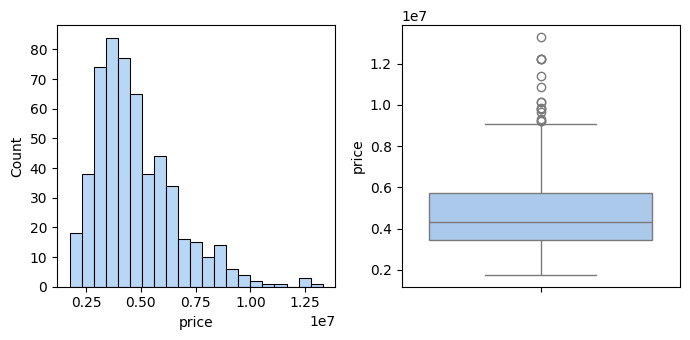

In [16]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams['figure.autolayout'] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(d1, x='price', ax=axes[0])
sns.boxplot(d1, y='price', ax=axes[1])
plt.show()

房价呈右偏态分布，大部分处于中等水平，而部分极大值提高了平均房价

### 2.2面积分布

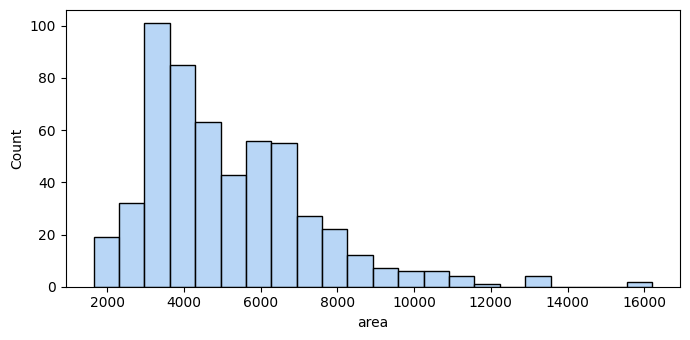

In [17]:
sns.histplot(d1, x='area')
plt.show()

面积同房价呈右偏态分布

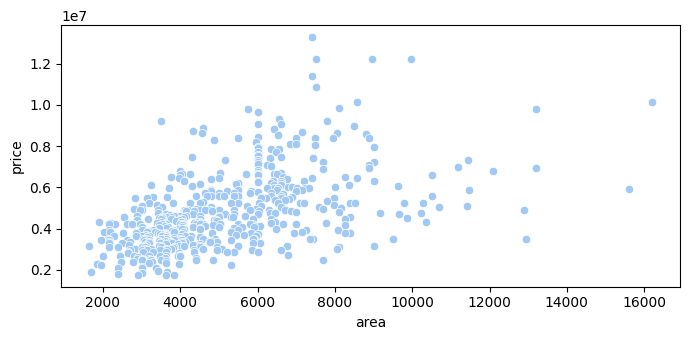

In [18]:
sns.scatterplot(d1, x='area', y='price')
plt.show()

可看出除了部分极值外，大部分数据处于正相关的集群范围内

### 2.3卧室与房价分布

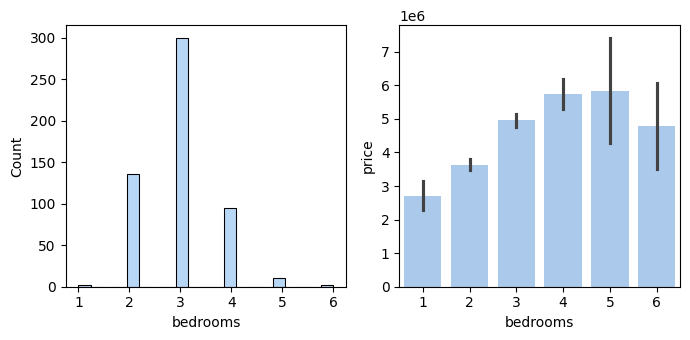

In [19]:
figure, axes = plt.subplots(1, 2)
sns.histplot(d1, x='bedrooms', ax=axes[0])
sns.barplot(d1, x='bedrooms', y='price', ax=axes[1])
plt.show()

大多数房屋在2-4个卧室，而直到5个卧室前，房价基本随卧室数量呈正相关，当达到5个卧室时房价涨幅开始停滞乃至倒退

### 2.4浴室与房价分布

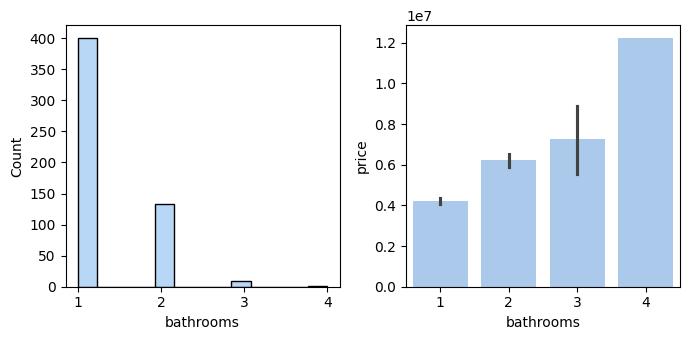

In [20]:
figure, axes = plt.subplots(1, 2)
sns.histplot(d1, x='bathrooms', ax=axes[0])
sns.barplot(d1, x='bathrooms', y='price', ax=axes[1])
plt.show()

浴室数基本只局限于2个以内，而房价也随浴室数量呈现正相关

### 2.5楼层数与房价分布

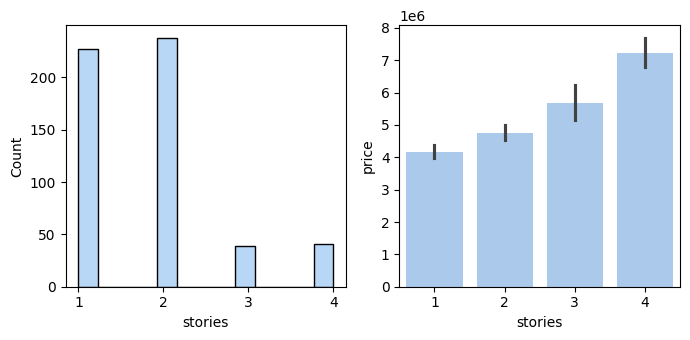

In [21]:
figure, axes = plt.subplots(1, 2)
sns.histplot(d1, x='stories', ax=axes[0])
sns.barplot(d1, x='stories', y='price', ax=axes[1])
plt.show()

售出房子主要在2层内，且楼层越高价格越高

### 2.6车库与房价分布

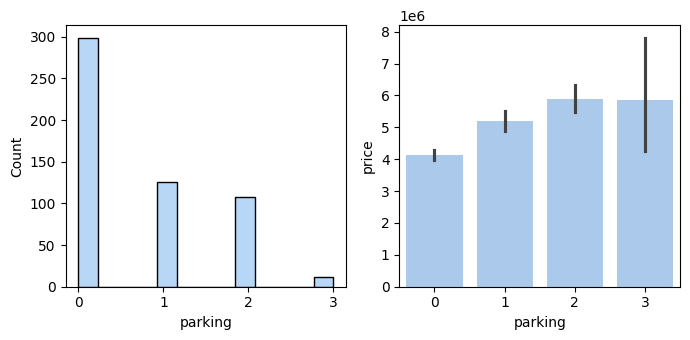

In [22]:
figure, axes = plt.subplots(1, 2)
sns.histplot(d1, x='parking', ax=axes[0])
sns.barplot(d1, x='parking', y='price', ax=axes[1])
plt.show()

车库数量主要在0-2个，其中不带车库的房最多。虽然在0-2之间房价随车库呈正相关，但是超过2个时就出现停滞

### 2.7路段与房价

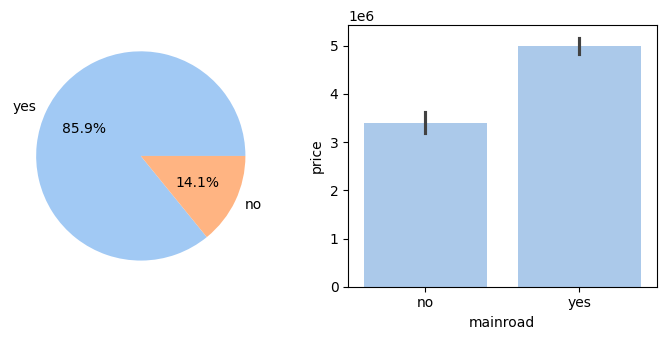

In [23]:
figure, axes = plt.subplots(1, 2)
d1_r = d1['mainroad'].value_counts()
d1_i = d1_r.index
axes[0].pie(d1_r, labels=d1_i, autopct='%.1f%%')
sns.barplot(d1, x='mainroad', y='price', ax=axes[1])
plt.show()

由图可见主路段房屋销售量远超非主路段，且主路段房屋售价也大幅超过非主路段，因此路段对房价且房屋销售难度的影响非常大

### 2.8地下室与房价

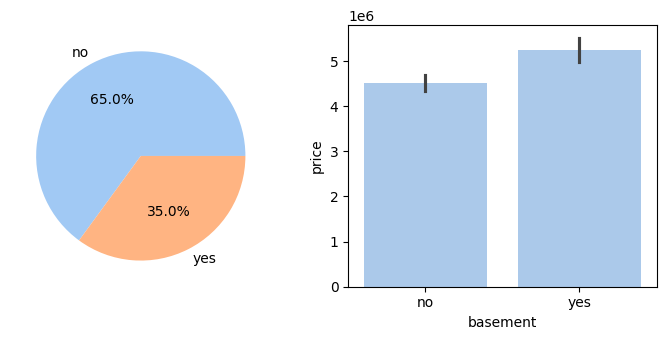

In [24]:
figure, axes = plt.subplots(1, 2)
d2_r = d1['basement'].value_counts()
d2_i = d2_r.index
axes[0].pie(d2_r, labels=d2_i, autopct='%.1f%%')
sns.barplot(d1, x='basement', y='price', ax=axes[1])
plt.show()

大部分房屋并不具有地下室，但是需要考虑到楼房仅1层具有地下室，因此地下室的吸引力还有待后续分析。

而带地下室的房子价格也更高

### 2.9客房与房价

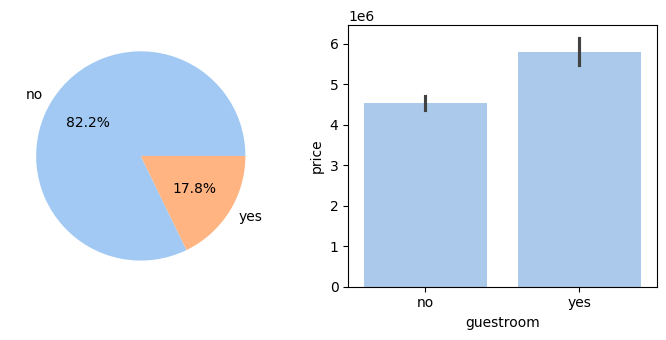

In [25]:
figure, axes = plt.subplots(1, 2)
d3_r = d1['guestroom'].value_counts()
d3_i = d3_r.index
axes[0].pie(d3_r, labels=d3_i, autopct='%.1f%%')
sns.barplot(d1, x='guestroom', y='price', ax=axes[1])
plt.show()

该数据中大多数房子都不带客房，且具备客房的价格更高


### 2.10热水器与房价

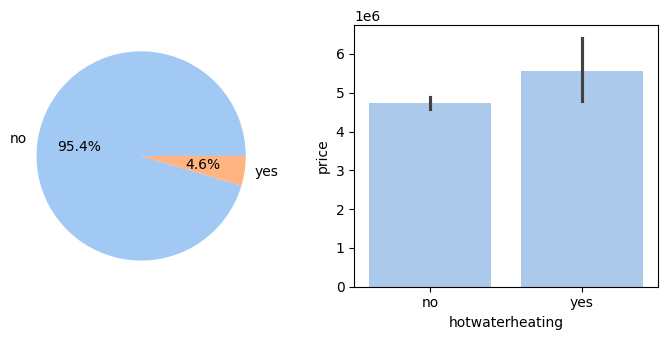

In [26]:
figure, axes = plt.subplots(1, 2)
d4_r = d1['hotwaterheating'].value_counts()
d4_i = d4_r.index
axes[0].pie(d4_r, labels=d4_i, autopct='%.1f%%')
sns.barplot(d1, x='hotwaterheating', y='price', ax=axes[1])
plt.show()

该数据中大部分房都不具备热水器，且携带热水器的房价格更高

### 2.11空调与房价

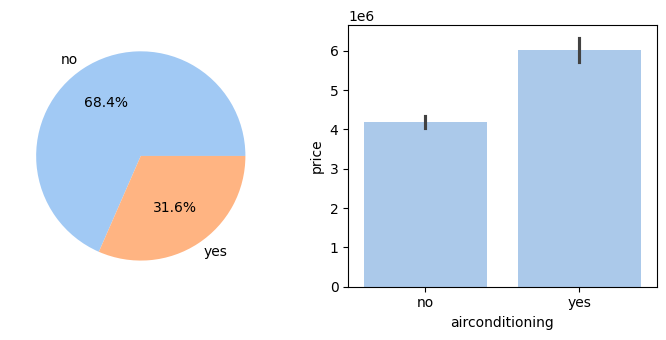

In [27]:
figure, axes = plt.subplots(1, 2)
d5_r = d1['airconditioning'].value_counts()
d5_i = d5_r.index
axes[0].pie(d5_r, labels=d5_i, autopct='%.1f%%')
sns.barplot(d1, x='airconditioning', y='price', ax=axes[1])
plt.show()

该数据中大部分房都不带空调，且带空调的房价格更高

### 2.12城市首选社区与房价

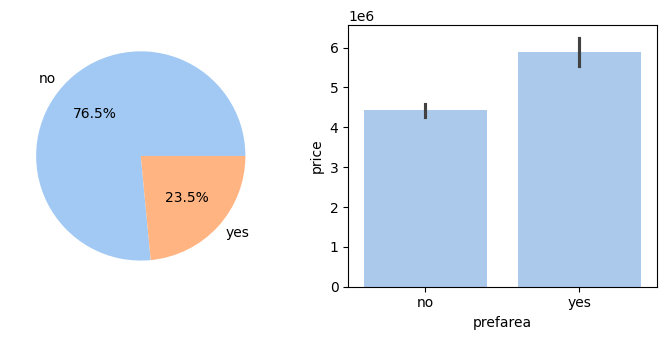

In [28]:
figure, axes = plt.subplots(1, 2)
d6_r = d1['prefarea'].value_counts()
d6_i = d6_r.index
axes[0].pie(d6_r, labels=d6_i, autopct='%.1f%%')
sns.barplot(d1, x='prefarea', y='price', ax=axes[1])
plt.show()

大部分房都不在首选社区，而首选社区的房价明显更高

### 2.13装修状态与房价

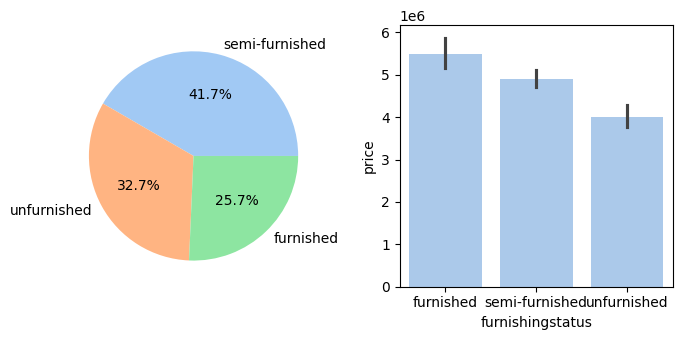

In [29]:
figure, axes = plt.subplots(1, 2)
d7_r = d1['furnishingstatus'].value_counts()
d7_i = d7_r.index
axes[0].pie(d7_r, labels=d7_i, autopct='%.1f%%')
sns.barplot(d1, x='furnishingstatus', y='price', ax=axes[1])
plt.show()

该数据集中简装修数量最多，精装修最少；

而房价与装修水平呈正相关

## 3.分析

In [30]:
d2 = d1.copy()
d2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


3.1将分类变量转变为回归模型所需的虚拟变量

In [31]:
d2d = pd.get_dummies(d2, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], dtype=int, drop_first=True)
d2d

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


3.2设置自变量与因变量

In [32]:
y = d2d['price']

In [33]:
x = d2d.drop('price', axis=1)

In [34]:
x.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


由图可知，不同自变量间的相关性小于0.8

3.3添加方程截距值

In [35]:
x = sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


3.4调用OLS函数生成回归模型参数

In [36]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          9.07e-123
Time:                        19:41:52   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

由于该分析着眼于自变量是否影响价格，因此显著区间设置0.05

如图模型认为卧室，简装修，截距与房价并无明显关系

将以上自变量去除建立更精确模型

In [37]:
x = x.drop(['const', 'bedrooms', 'furnishingstatus_semi-furnished'], axis=1)
x

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [38]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                        0.00
Time:                        19:41:53   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

由图可见，当非影响自变量删除后R方提升到了0.957，模型对该数据集的拟合度提升

根据模型结果，房价会伴随该模型中任意自变量提高而增长

## 4.预测房价

房源信息：面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [44]:
d3 = pd.DataFrame({'area':[6500], 'bedrooms':[4], 'bathrooms':[2], 'stories':[2], 'mainroad':['no'], 'guestroom':['no'], 'basement':['yes'], 'hotwaterheadting':['yes'], 'airdonditioning':['no'], 'parking':[2], 'prefarea':['yes'], 'furnishingstatus':['semi_furnished']})
d3

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheadting,airdonditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi_furnished


### 4.1统一分类变量

In [40]:
d3['mainroad'] = pd.Categorical(d3['mainroad'], categories=['no', 'yes'])
d3['guestroom'] = pd.Categorical(d3['guestroom'], categories=['no', 'yes'])
d3['basement'] = pd.Categorical(d3['basement'], categories=['no', 'yes'])
d3['hotwaterheadting'] = pd.Categorical(d3['hotwaterheadting'], categories=['no', 'yes'])
d3['airdonditioning'] = pd.Categorical(d3['airdonditioning'], categories=['no', 'yes'])
d3['prefarea'] = pd.Categorical(d3['prefarea'], categories=['no', 'yes'])
d3['furnishingstatus'] = pd.Categorical(d3['furnishingstatus'], categories=['furnished', 'semi_furnished', 'unfurnished'])


In [41]:
d3d = pd.get_dummies(d3, ['mainroad', 'guestroom', 'basement', 'hotwaterheadting', 'airdonditioning', 'prefarea', 'furnishingstatus'], dtype=int, drop_first=True)
d3d

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheadting_yes,airdonditioning_yes,prefarea_yes,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,0,1,1,0,1,1,0


In [42]:
d3d = d3d.drop(['bedrooms', 'furnishingstatus_semi_furnished'], axis=1)
d3d

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheadting_yes,airdonditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,6500,2,2,2,0,0,1,1,0,1,0


### 4.2模型预测

In [45]:
d3r = model.predict(d3d)
d3r

0    7.303754e+06
dtype: float64

最终模型预测房价为：7303754